<b><h1><center>IE406: Machine Learning<center>Group: 14</center><h1></b>
<h3><center>Tipsi Jadav: 201801091</center></h3>
<h3><center>Tanishqa Lalwani: 201801139</center></h3>
<h3><center>Astha Shah: 201801169</center></h3>
<h3><center>Shreya Joshi: 201801174</center></h3>
<h3><center>Maulina Raina: 201801186</center></h3>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/IE406-Machine_Learning/Project/Codes/YOLO/TensorFlow-2.x-YOLOv3

In [3]:
#!pip install -r ./requirements.txt

In [4]:
#!python train.py

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
import cv2
import numpy as np
from yolov3.utils import detect_image, Load_Yolo_model
from yolov3.configs import *

yolo = Load_Yolo_model()

Loading custom weights from: ./checkpoints/yolov3_custom


#Train

In [7]:
pred_cor_train = []
for i in range(134):
  image_path   = f"./custom_data/Train/Cars{i}.jpg"
  image, bb = detect_image(yolo, image_path, f"./IMAGES/plate_{i}_detect.jpg", input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
     
  pred_cor_train.append(bb)

In [8]:
file_train = open("./model_data/coco/license_plate_train.txt","r+") 
coordinate_train = []
for element in file_train:
  crd = element.split(' ')
  temp = []
  for i in range(1, len(crd)):
    get_cr = crd[i].split(',')
    get_cr2 = map(int, get_cr)
    get_cr3 = list(get_cr2)
    temp.append(get_cr3[:4])
  
  coordinate_train.append(temp)

###IoU

In [9]:
iou_train = []
for i in range(len(pred_cor_train)):
  
  pred_image = np.zeros((512,512))
  for j in range(len(pred_cor_train[i])):
    x1 = int(round(pred_cor_train[i][j][0]))
    x2 = int(round(pred_cor_train[i][j][2]) + 1)
    y1 = int(round(pred_cor_train[i][j][1]))
    y2 = int(round(pred_cor_train[i][j][3]) + 1)
    pred_image[x1:x2, y1:y2] += 1
  
  grd_image = np.zeros((512,512))
  for j in range(len(coordinate_train[i])):
    x1 = int(round(coordinate_train[i][j][0]))
    x2 = int(round(coordinate_train[i][j][2]) + 1)
    y1 = int(round(coordinate_train[i][j][1]))
    y2 = int(round(coordinate_train[i][j][3]) + 1)
    grd_image[x1:x2, y1:y2] += 1
    
  inter_area = np.sum(np.multiply(pred_image, grd_image))
  sum_box1 = np.sum(pred_image)
  sum_box2 = np.sum(grd_image)
  
  iou_temp = inter_area/(sum_box1 + sum_box2 - inter_area)
  
  iou_train.append(iou_temp)

In [10]:
mean_iou_train = np.mean(np.array(iou_train))
print(round(mean_iou_train, 3))

0.856


#Test

In [11]:
pred_cor_test = []
for i in range(134):
  image_path   = f"./custom_data/Test/Cars{i}.jpg"
  image, bb = detect_image(yolo, image_path, f"./IMAGES/plate_{i}_detect.jpg", input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
     
  pred_cor_test.append(bb)

In [12]:
file_test = open("./model_data/coco/license_plate_test.txt","r+") 
coordinate_test = []
for element in file_test:
  crd = element.split(' ')
  temp = []
  for i in range(1, len(crd)):
    get_cr = crd[i].split(',')
    get_cr2 = map(int, get_cr)
    get_cr3 = list(get_cr2)
    temp.append(get_cr3[:4])
  
  coordinate_test.append(temp)

###IoU

In [13]:
iou_test = []
for i in range(len(pred_cor_test)):
  
  pred_image = np.zeros((512,512))
  for j in range(len(pred_cor_test[i])):
    x1 = int(round(pred_cor_test[i][j][0]))
    x2 = int(round(pred_cor_test[i][j][2]) + 1)
    y1 = int(round(pred_cor_test[i][j][1]))
    y2 = int(round(pred_cor_test[i][j][3]) + 1)
    pred_image[x1:x2, y1:y2] += 1
  
  grd_image = np.zeros((512,512))
  for j in range(len(coordinate_test[i])):
    x1 = int(round(coordinate_test[i][j][0]))
    x2 = int(round(coordinate_test[i][j][2]) + 1)
    y1 = int(round(coordinate_test[i][j][1]))
    y2 = int(round(coordinate_test[i][j][3]) + 1)
    grd_image[x1:x2, y1:y2] += 1
    
  inter_area = np.sum(np.multiply(pred_image, grd_image))
  sum_box1 = np.sum(pred_image)
  sum_box2 = np.sum(grd_image)
  
  iou_temp = inter_area/(sum_box1 + sum_box2 - inter_area)
  
  iou_test.append(iou_temp)

In [14]:
mean_iou_test = np.mean(np.array(iou_test))
print(round(mean_iou_test, 3))

0.8


###mAP

In [15]:
from evaluate_mAP import get_mAP
from yolov3.dataset import Dataset

In [16]:
testset = Dataset('test')

In [17]:
map = get_mAP(yolo, testset, score_threshold=0.5, iou_threshold=0.45, TEST_INPUT_SIZE=512)


calculating mAP45...

94.355% = license-plate AP  
mAP = 94.355%, 0.59 FPS


#Predictions

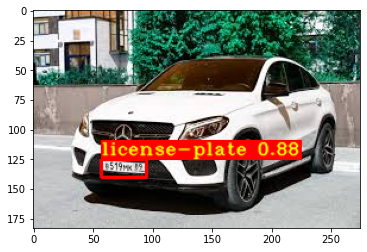

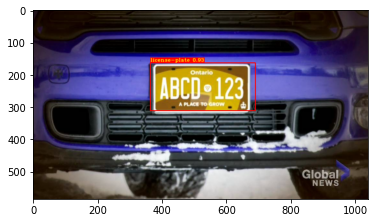

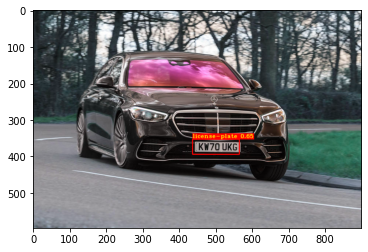

In [8]:
import matplotlib.pyplot as plt

for i in range(3):
  image_path= f"./custom_data/Test_own/Cars{i+1}.jpeg"
  img = cv2.imread(image_path)
  image, bb = detect_image(yolo, image_path, f"./IMAGES/i_{i}_detect.jpg", input_size=YOLO_INPUT_SIZE, show=True, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))

  plt.imshow(image)
  plt.show()